This example should display the expected straight line on a log-linear when simulating an MSMPR 

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\wuyua\Projects\PycharmProjects\crm


In [35]:
from crm.mcsolver import MCSolver, MCSolverOptions, MCState
from crm.base.input import ContinuousInput
from crm.base.state import InletState
from crm.base.output_spec import OutputLastSpec
from crm.presets.hypothetical import Hypothetical1D
from crm.utils.pandas import StateDataFrame
from crm.utils.csd_grid import edges_to_center_grid
from matplotlib import pyplot as plt

In [21]:
system_spec = Hypothetical1D()
inlet_state = system_spec.make_empty_state(state_type=InletState, concentration=system_spec.forms[0].solubility(60), temperature=25, rt=300)
input_ = ContinuousInput(inlet_state)

initial_condition = system_spec.make_empty_state(concentration=system_spec.forms[0].solubility(25), temperature=25)

options = MCSolverOptions(output_spec=OutputLastSpec())
solver = MCSolver(system_spec, options)


In [22]:
output = solver.compute(init_state=initial_condition, solve_time=3600, input_=input_)

In [23]:
sdf = StateDataFrame(output)

In [27]:
n = sdf.get_csd()

In [37]:
edge = n[1]
grid = edges_to_center_grid(edge)
data = n[0]["alpha", 0]

Text(0.5, 0, 'Size (micron)')

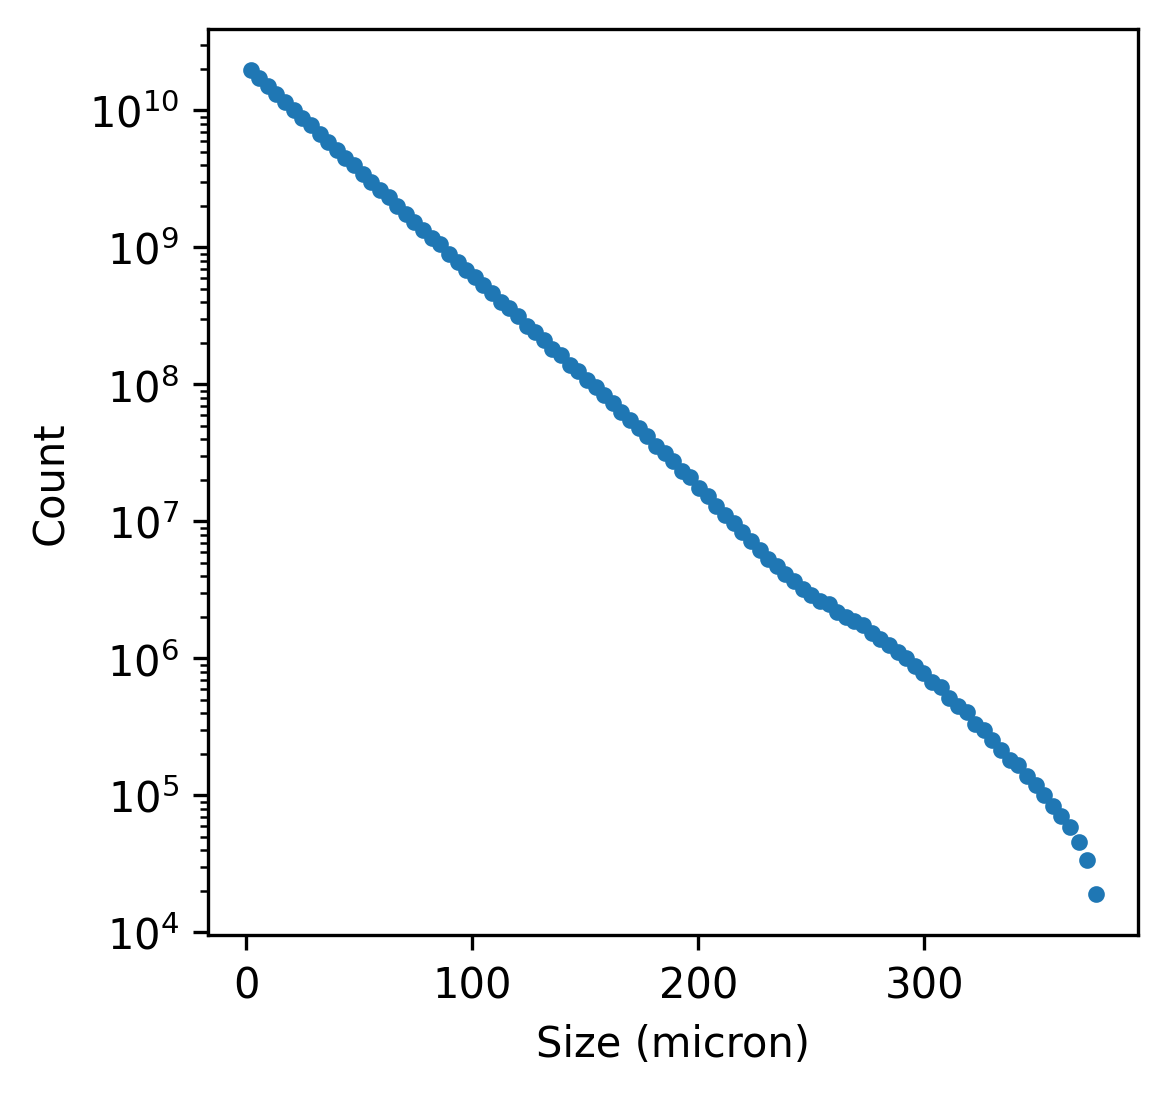

In [49]:
plt.figure(figsize=(4,4), dpi=300)
plt.plot(grid*1e6, data.iloc[0], ".")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Size (micron)")